# Rf 3 1 1_Rangeplot

Multidimensional models: projecting p.d.f and data ranges in continuous observables




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:50 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create 3D pdf and data
-------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)
z = ROOT.RooRealVar("z", "z", -5, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create signal pdf gauss(x)*gauss(y)*gauss(z)

In [3]:
gx = ROOT.RooGaussian(
    "gx", "gx", x, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
gy = ROOT.RooGaussian(
    "gy", "gy", y, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
gz = ROOT.RooGaussian(
    "gz", "gz", z, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
sig = ROOT.RooProdPdf("sig", "sig", ROOT.RooArgList(gx, gy, gz))

Create background pdf poly(x)*poly(y)*poly(z)

In [4]:
px = ROOT.RooPolynomial("px", "px", x, ROOT.RooArgList(
    ROOT.RooFit.RooConst(-0.1), ROOT.RooFit.RooConst(0.004)))
py = ROOT.RooPolynomial("py", "py", y, ROOT.RooArgList(
    ROOT.RooFit.RooConst(0.1), ROOT.RooFit.RooConst(-0.004)))
pz = ROOT.RooPolynomial("pz", "pz", z)
bkg = ROOT.RooProdPdf("bkg", "bkg", ROOT.RooArgList(px, py, pz))

Create composite pdf sig+bkg

In [5]:
fsig = ROOT.RooRealVar("fsig", "signal fraction", 0.1, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "model", ROOT.RooArgList(
        sig, bkg), ROOT.RooArgList(fsig))

data = model.generate(ROOT.RooArgSet(x, y, z), 20000)

Project pdf and data on x
-------------------------------------------------

Make plain projection of data and pdf on x observable

In [6]:
frame = x.frame(ROOT.RooFit.Title(
    "Projection of 3D data and pdf on X"), ROOT.RooFit.Bins(40))
data.plotOn(frame)
model.plotOn(frame)

<ROOT.RooPlot object ("frame_x_5619a0c912c0") at 0x5619a0c912c0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y,z)


Project pdf and data on x in signal range
----------------------------------------------------------------------------------

Define signal region in y and z observables

In [7]:
y.setRange("sigRegion", -1, 1)
z.setRange("sigRegion", -1, 1)

[#1] INFO:Eval -- RooRealVar::setRange(y) new range named 'sigRegion' created with bounds [-1,1]
[#1] INFO:Eval -- RooRealVar::setRange(z) new range named 'sigRegion' created with bounds [-1,1]


Make plot frame

In [8]:
frame2 = x.frame(ROOT.RooFit.Title(
    "Same projection on X in signal range of (Y,Z)"), ROOT.RooFit.Bins(40))

Plot subset of data in which all observables are inside "sigRegion"
For observables that do not have an explicit "sigRegion" range defined (e.g. observable)
an implicit definition is used that is identical to the full range (i.e.
[-5,5] for x)

In [9]:
data.plotOn(frame2, ROOT.RooFit.CutRange("sigRegion"))

<ROOT.RooPlot object ("frame_x_5619a0859560") at 0x5619a0859560>

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 1692 events out of 20000 total events


Project model on x, projected observables (y,z) only in "sigRegion"

In [10]:
model.plotOn(frame2, ROOT.RooFit.ProjectionRange("sigRegion"))

c = ROOT.TCanvas("rf311_rangeplot", "rf310_rangeplot", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()

c.SaveAs("rf311_rangeplot.png")

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y,z) in range sigRegion


Info in <TCanvas::Print>: png file rf311_rangeplot.png has been created


Draw all canvases 

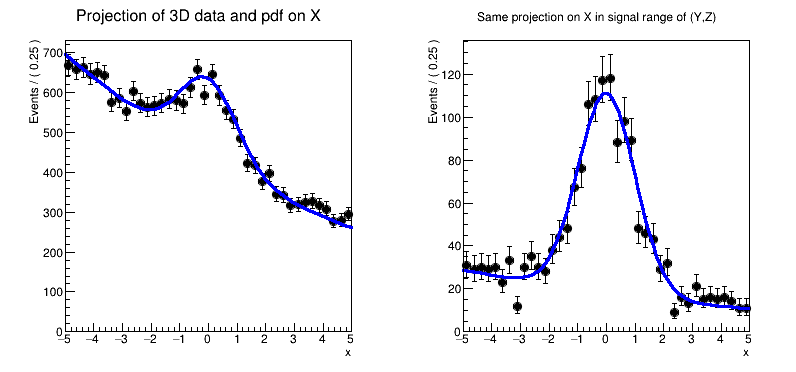

In [11]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()